In [17]:
import numpy as np
#data visualization 
import pandas as pd
import matplotlib.pyplot as plt
#Preprocessing
from sklearn.preprocessing import StandardScaler
#Neural Network 
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import layers, models, optimizers
from keras.layers import Conv1D,Dense,Dropout,MaxPooling1D, Flatten
from keras.models import load_model
from itertools import chain
#Evaluation
from sklearn.metrics import *



In [19]:
#reading data
train_data = pd.read_csv('exoTrain.csv')
test_data = pd.read_csv('exoTest.csv')

In [20]:
train_data.describe()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
count,5087.000000,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,...,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5.087000e+03,5087.000000,5087.000000,5087.000000,5087.000000
mean,1.007273,1.445054e+02,1.285778e+02,1.471348e+02,1.561512e+02,1.561477e+02,1.469646e+02,1.168380e+02,1.144983e+02,1.228639e+02,...,3.485578e+02,4.956476e+02,6.711211e+02,7.468790e+02,6.937372e+02,6.553031e+02,-494.784966,-544.594264,-440.239100,-300.536399
std,0.084982,2.150669e+04,2.179717e+04,2.191309e+04,2.223366e+04,2.308448e+04,2.410567e+04,2.414109e+04,2.290691e+04,2.102681e+04,...,2.864786e+04,3.551876e+04,4.349963e+04,4.981375e+04,5.087103e+04,5.339979e+04,17844.469520,17722.339334,16273.406292,14459.795577
min,1.000000,-2.278563e+05,-3.154408e+05,-2.840018e+05,-2.340069e+05,-4.231956e+05,-5.975521e+05,-6.724046e+05,-5.790136e+05,-3.973882e+05,...,-3.240480e+05,-3.045540e+05,-2.933140e+05,-2.838420e+05,-3.288214e+05,-5.028894e+05,-775322.000000,-732006.000000,-700992.000000,-643170.000000
25%,1.000000,-4.234000e+01,-3.952000e+01,-3.850500e+01,-3.505000e+01,-3.195500e+01,-3.338000e+01,-2.813000e+01,-2.784000e+01,-2.683500e+01,...,-1.760000e+01,-1.948500e+01,-1.757000e+01,-2.076000e+01,-2.226000e+01,-2.440500e+01,-26.760000,-24.065000,-21.135000,-19.820000
50%,1.000000,-7.100000e-01,-8.900000e-01,-7.400000e-01,-4.000000e-01,-6.100000e-01,-1.030000e+00,-8.700000e-01,-6.600000e-01,-5.600000e-01,...,2.600000e+00,2.680000e+00,3.050000e+00,3.590000e+00,3.230000e+00,3.500000e+00,-0.680000,0.360000,0.900000,1.430000
75%,1.000000,4.825500e+01,4.428500e+01,4.232500e+01,3.976500e+01,3.975000e+01,3.514000e+01,3.406000e+01,3.170000e+01,3.045500e+01,...,2.211000e+01,2.235000e+01,2.639500e+01,2.909000e+01,2.780000e+01,3.085500e+01,18.175000,18.770000,19.465000,20.280000
max,2.000000,1.439240e+06,1.453319e+06,1.468429e+06,1.495750e+06,1.510937e+06,1.508152e+06,1.465743e+06,1.416827e+06,1.342888e+06,...,1.779338e+06,2.379227e+06,2.992070e+06,3.434973e+06,3.481220e+06,3.616292e+06,288607.500000,215972.000000,207590.000000,211302.000000


In [21]:
#value counts for each dataset 
print("Number of Label parameters in training dataset: \n", train_data['LABEL'].value_counts())
print("Number of Label parameters in testing dataset: \n", test_data['LABEL'].value_counts())

Number of Label parameters in training dataset: 
 1    5050
2      37
Name: LABEL, dtype: int64
Number of Label parameters in testing dataset: 
 1    565
2      5
Name: LABEL, dtype: int64


In [22]:
#Graph to display flux values 
def graph(dataset, row, dataframe, title):
    if dataframe:
        graph = plt.figure(figsize=(15,5))
        axis=graph.add_subplot()
        axis.set_title(title,fontsize=20)
        axis.set_xlabel('time',fontsize=10)
        axis.set_ylabel('Flux '+str(row), fontsize=10)
        time= list(dataset.columns)
        values= dataset[time].iloc[row]
        axis.plot([i  for i in range(dataset.shape[1])], values,'orange')
        axis.tick_params(colors='blue')
        plt.show()
    else:
        graph= plt.figure(figsize=(15,5))
        axis= graph.add_subplot()
        axis.set_title(title, fontsize=20)
        axis.set_xlabel('Time', color='black')
        axis.set_ylabel('Flux'+str(row), color='black')
        values=dataset[row]
        axis.plot([i  for i in range(dataset.shape[1])], values,'blue')
        plt.show()
        
        
def display(dataframe, dataset):
    planet= train_data[train_data['LABEL']==2].head(3).index
    no_planet=train_data[train_data['LABEL']==1].head(3).index
    for row in planet:
        graph(dataset,row,dataframe,title='Dips in flux')
    for row in no_planet:
        graph(dataset,row,dataframe,title='No Transisting Planet')
        


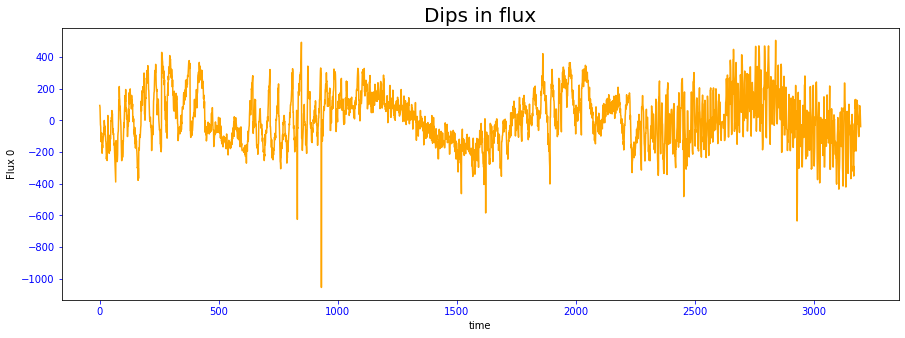

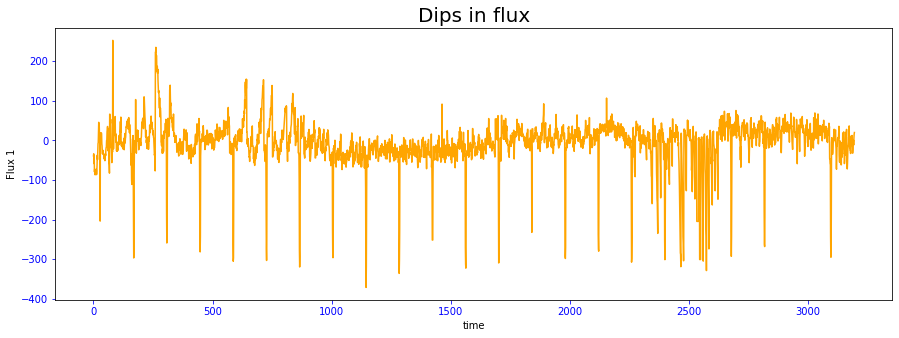

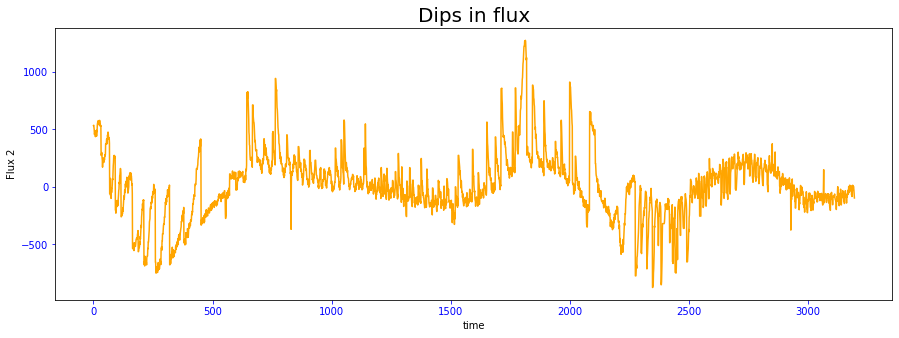

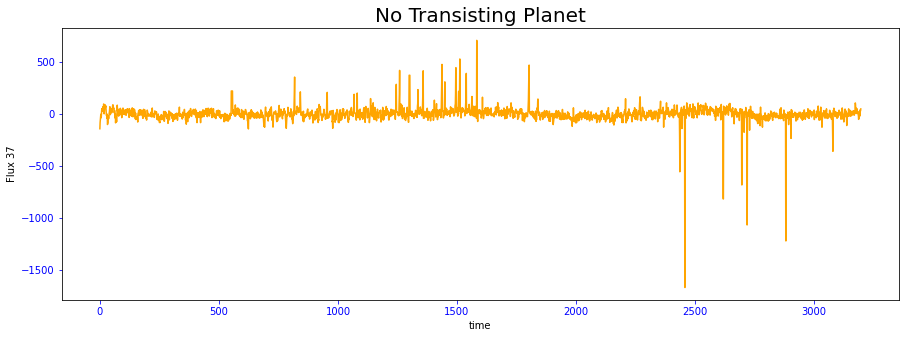

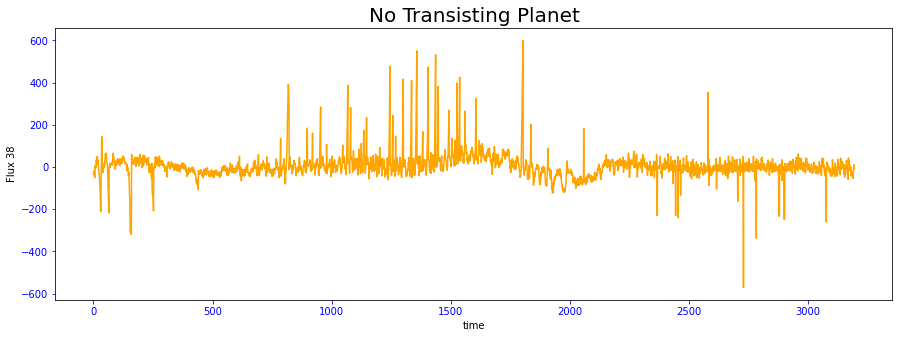

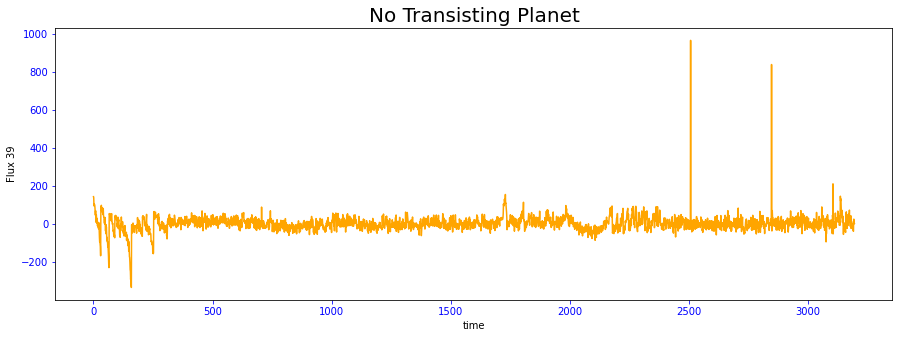

In [23]:
#displaying all column values except for LABEL
display(True, dataset = train_data.loc[:, train_data.columns != 'LABEL'])


Preprocessing techniques 

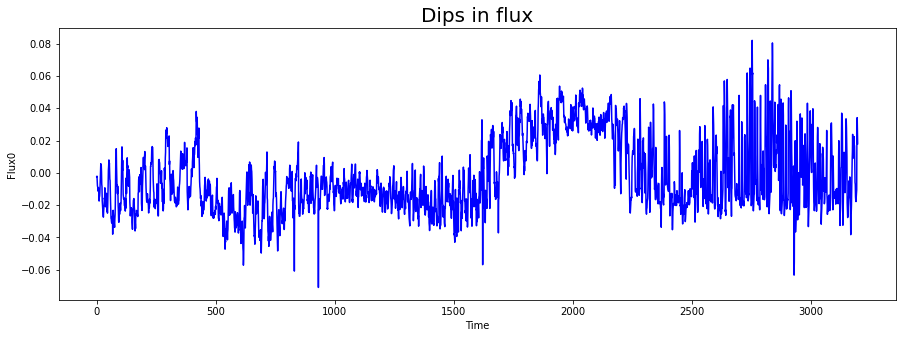

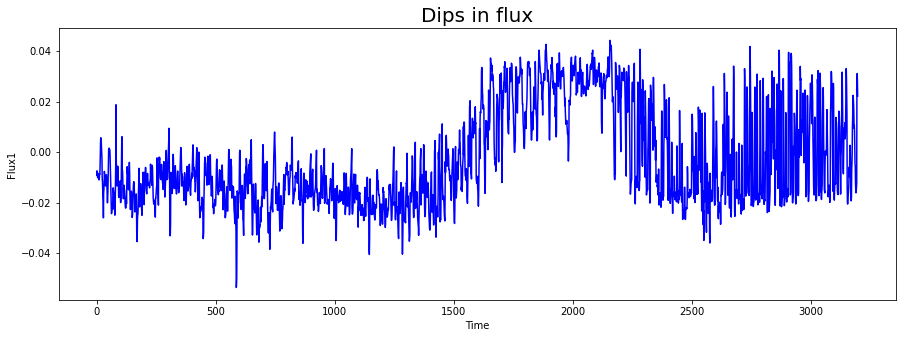

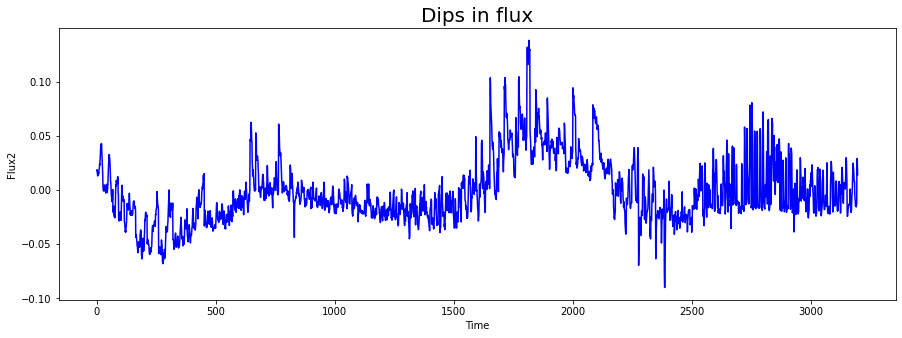

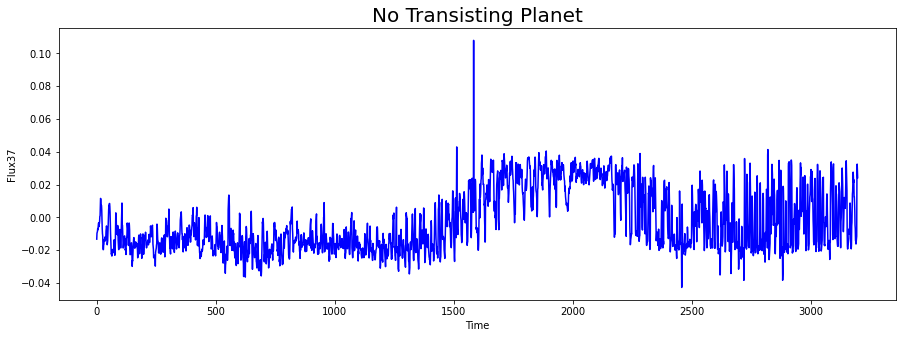

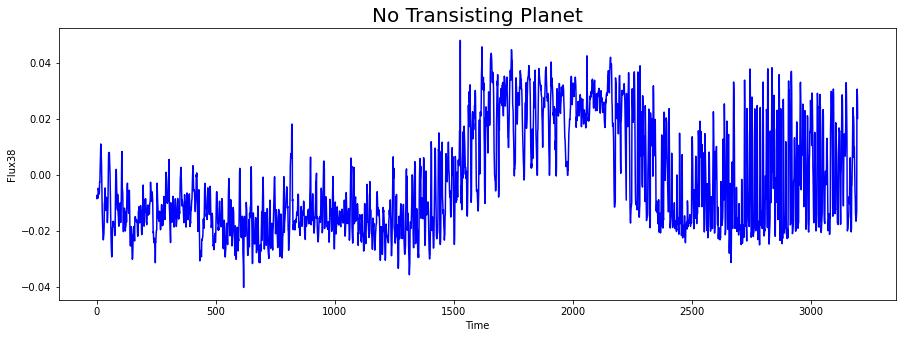

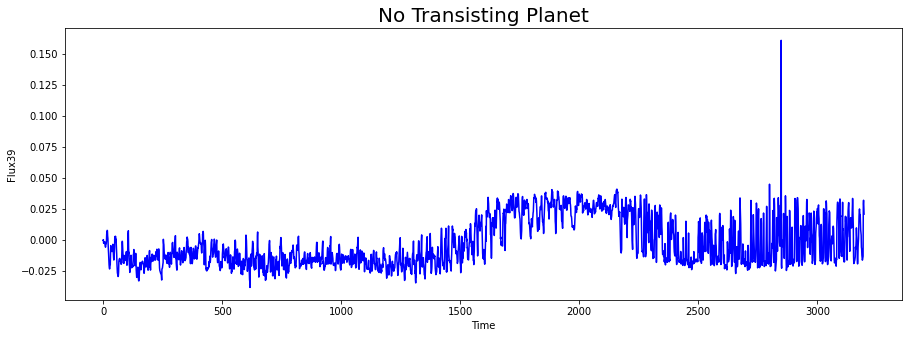

In [24]:
#standard scaler  
scaler = StandardScaler()
scaled = scaler.fit_transform(train_data.loc[:, train_data.columns != 'LABEL'])
display(False, scaled)

CNN Model 

In [25]:
#assigning variables to dataset 
x_train, y_train = train_data.loc[:, train_data.columns != 'LABEL'], train_data.loc[:, 'LABEL']
x_test, y_test = test_data.loc[:, test_data.columns != 'LABEL'], test_data.loc[:, 'LABEL']

features= x_train.shape[1]
print(y_train.shape)


(5087,)


In [26]:
#CNN Arcitecture 
model = Sequential()
model.add(keras.layers.Reshape((3197, 1), input_shape=(3197,)))
model.add(Conv1D(filters=10,activation='relu',input_shape=(features,1), kernel_size=2))
model.add(MaxPooling1D(pool_size=2,strides=3))
model.add(Flatten())
model.add(Dense(48,activation='swish'))
model.add(Dense(18,activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1,'sigmoid'))
#compile
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#fit data
fit=model.fit(x_train,y_train, epochs=30, batch_size=64, shuffle=True, verbose=2,validation_split=0.2,)


Epoch 1/30
64/64 - 3s - loss: -1.1060e+02 - accuracy: 0.9855 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 3s/epoch - 43ms/step
Epoch 2/30
64/64 - 2s - loss: -3.0175e+02 - accuracy: 0.9907 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 26ms/step
Epoch 3/30
64/64 - 2s - loss: -1.1359e+03 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 29ms/step
Epoch 4/30
64/64 - 2s - loss: -8.8793e+03 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 31ms/step
Epoch 5/30
64/64 - 2s - loss: -7.9918e+03 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 27ms/step
Epoch 6/30
64/64 - 2s - loss: -1.3523e+04 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 26ms/step
Epoch 7/30
64/64 - 2s - loss: -2.3502e+04 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_accuracy: 1.0000 - 2s/epoch - 27ms/step
Epoch 8/30
64/64 - 2s - loss: -4.1006e+04 - accuracy: 0.9909 - val_loss: 0.0000e+00 - val_

In [27]:
#Evaluation
training_accuracy= model.evaluate(x_train,y_train)
testing_accuracy=model.evaluate(x_test,y_test)
print('Training Accuracy: %s , Testing Accuracy: %s' % (training_accuracy[1:],testing_accuracy[1:]))


18/18 [==============================] - 0s 7ms/step - loss: -1354235.6250 - accuracy: 0.9912
Training Accuracy: [0.9927265644073486] , Testing Accuracy: [0.9912280440330505]


In [28]:
fit.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

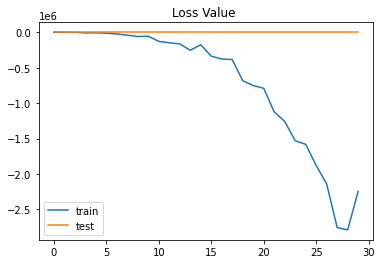

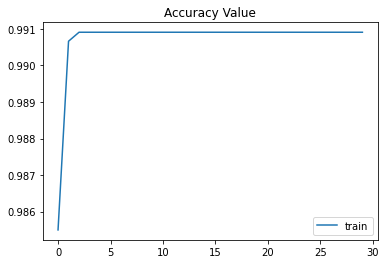

In [41]:
#Prediction 
prediction = model.predict(x_test)
accuracy=accuracy_score(y_test,prediction)
balanced= balanced_accuracy_score(y_test, prediction)
auc=roc_auc_score(y_test,prediction)


#graph 

plt.figure()
plt.title("Loss Value ")
plt.plot(fit.history['loss'], label='train')
plt.plot(fit.history['val_loss'], label='test')
plt.legend()

plt.figure()
plt.title("Accuracy Value")
plt.plot(fit.history['accuracy'], label='train')
plt.legend()
plt.show()
